## DSC 180A: Final Project Code

#### Names: Viswesh Uppalapati and Skylar Wang
#### Section: A10

In [2]:
import datetime
from twarc.client import Twarc
import pandas as pd
import numpy as np
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import io
import jsonlines
import matplotlib.pyplot as plt
import urlextract
import requests

### Setup and Initial Trial to Retrieve Data

In [3]:
temp = Twarc(consumer_key = "8PbklgkKB0iOpRtNoDpcK4QmZ",
            consumer_secret = "n36SGsyur75tclPbObX2zuLBBrUW8PC6DVTn3ZWbPMiUzQ5iuP",
            access_token = "1453533683218927616-YerjYEApEUtGw7iqWAFwtdFRhfUgjo",
            access_token_secret = "jsrj1FsUBwzKmNRTc8IG4snDsjT3AetHeScwhGVRzCkSU")

In [5]:
ids = pd.read_csv(gzip.open("2020-10-02_clean-dataset.tsv.gz"), sep = "\t")
ids

,tweet_id,date,time,lang,country_code
0,1311878600208134149,2020-10-02,04:00:06,en,NaN
1,1311878600518438912,2020-10-02,04:00:06,es,NaN
2,1311878600652730372,2020-10-02,04:00:06,und,DE
3,1311878600682070023,2020-10-02,04:00:06,or,NaN
4,1311878601046921217,2020-10-02,04:00:06,en,NaN
...,...,...,...,...,...
917212,1312241580816777217,2020-10-03,04:02:27,en,NaN
917213,1312241581617897472,2020-10-03,04:02:27,en,NaN
917214,1312241581748035584,2020-10-03,04:02:28,en,NaN
917215,1312241582939275266,2020-10-03,04:02:28,en,NaN


In [6]:
subset = np.random.choice(ids['tweet_id'], 10000, replace = False)

In [7]:
tweets = temp.hydrate(iter(subset))

In [8]:
data = []
for x in tweets:
    data.append(x)

In [26]:
# proportion of tweets mentioning "Trump" (case insensitive)
count = 0
for tweet in data:
    if "trump" in tweet['full_text'].lower():
        count = count + 1
    
count / len(data)

0.29884756416972236

### Data Collection

In [49]:
# All 2020 tweets starting at 03/22/2020
tweet_ids_sample = []
for month in range(3, 13):
    for day in range(1, 32):
        temp_month = month
        temp_day = day
        
        temp = [3, 5, 7, 8, 10, 12]
        if month not in temp:
            if day > 30:
                continue
        
        if month < 10:
            temp_month = str('0' + str(month))
        if day < 10:
            temp_day = str('0' + str(day))
            
        if month == 3:
            if day < 30:
                continue
                
             
        date = "2020-" + str(temp_month) + '-' + str(temp_day)
        
        dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/" \
                    + date + "/" + date +"-dataset.tsv.gz?raw=true" #@param {type:"string"}
        
        print(dataset_URL)

        #Downloads the dataset (compressed in a GZ format)
        #!wget dataset_URL -O clean-dataset.tsv.gz
        wget.download(dataset_URL, out='dataset.tsv.gz')

        #Unzips the dataset and gets the TSV dataset
        with gzip.open('dataset.tsv.gz', 'rb') as f_in:
            with open('dataset.tsv', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        
        #Deletes the compressed GZ file
        os.unlink("dataset.tsv.gz")
        
        df = pd.read_csv('dataset.tsv',sep="\t")
        subset = np.random.choice(df['tweet_id'], 4200, replace = False)
        tweet_ids_sample.append(subset)

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-03-30/2020-03-30-dataset.tsv.gz?raw=true
100% [........................................................................] 26869511 / 26869511https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-03-31/2020-03-31-dataset.tsv.gz?raw=true
100% [........................................................................] 22822509 / 22822509https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-04-01/2020-04-01-dataset.tsv.gz?raw=true
100% [........................................................................] 26000657 / 26000657https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-04-02/2020-04-02-dataset.tsv.gz?raw=true
100% [........................................................................] 24343873 / 24343873https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-04-03/2020-04-03-dataset.tsv.gz?raw=true
100% [.......................

100% [........................................................................] 28554626 / 28554626https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-05-08/2020-05-08-dataset.tsv.gz?raw=true
100% [........................................................................] 27872967 / 27872967https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-05-09/2020-05-09-dataset.tsv.gz?raw=true
100% [........................................................................] 24194097 / 24194097https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-05-10/2020-05-10-dataset.tsv.gz?raw=true
100% [........................................................................] 26258274 / 26258274https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-05-11/2020-05-11-dataset.tsv.gz?raw=true
100% [........................................................................] 26758108 / 26758108https://github.com/thepanacealab/covid19_twit

  3% [..                                                                      ]   794624 / 21483854

 14% [..........                                                              ]  3080192 / 21483854

 23% [.................                                                       ]  5152768 / 21483854

 35% [.........................                                               ]  7569408 / 21483854

 47% [..................................                                      ] 10199040 / 21483854

 60% [...........................................                             ] 13041664 / 21483854

 72% [...................................................                     ] 15507456 / 21483854

 90% [................................................................        ] 19341312 / 21483854

100% [........................................................................] 21483854 / 21483854

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-07-24/2020-07-24-dataset.tsv.gz?raw=true
100% [........................................................................] 19762411 / 19762411https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-07-25/2020-07-25-dataset.tsv.gz?raw=true
100% [........................................................................] 20676020 / 20676020https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-07-26/2020-07-26-dataset.tsv.gz?raw=true
100% [........................................................................] 21121867 / 21121867https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-07-27/2020-07-27-dataset.tsv.gz?raw=true
100% [........................................................................] 26195041 / 26195041https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-07-28/2020-07-28-dataset.tsv.gz?raw=true
100% [.......................

  5% [...                                                                     ]   958464 / 18416818

 14% [..........                                                              ]  2678784 / 18416818

 23% [.................                                                       ]  4382720 / 18416818

 39% [............................                                            ]  7266304 / 18416818

 48% [..................................                                      ]  8880128 / 18416818

 63% [.............................................                           ] 11608064 / 18416818

 76% [.......................................................                 ] 14106624 / 18416818

 91% [.................................................................       ] 16769024 / 18416818

100% [........................................................................] 18416818 / 18416818

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-09-01/2020-09-01-dataset.tsv.gz?raw=true
100% [........................................................................] 15636185 / 15636185https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-09-02/2020-09-02-dataset.tsv.gz?raw=true
100% [........................................................................] 19989786 / 19989786https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-09-03/2020-09-03-dataset.tsv.gz?raw=true
100% [........................................................................] 18888879 / 18888879https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-09-04/2020-09-04-dataset.tsv.gz?raw=true
100% [........................................................................] 16434260 / 16434260https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-09-05/2020-09-05-dataset.tsv.gz?raw=true
100% [.......................

  7% [.....                                                                   ]  1482752 / 19098948

 22% [................                                                        ]  4374528 / 19098948

 40% [.............................                                           ]  7757824 / 19098948

 54% [.......................................                                 ] 10461184 / 19098948

 70% [..................................................                      ] 13516800 / 19098948

 91% [.................................................................       ] 17465344 / 19098948

100% [........................................................................] 19098948 / 19098948

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-10-10/2020-10-10-dataset.tsv.gz?raw=true
100% [........................................................................] 17304729 / 17304729https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-10-11/2020-10-11-dataset.tsv.gz?raw=true
100% [........................................................................] 16450548 / 16450548https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-10-12/2020-10-12-dataset.tsv.gz?raw=true
100% [........................................................................] 20366498 / 20366498https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-10-13/2020-10-13-dataset.tsv.gz?raw=true
100% [........................................................................] 20003208 / 20003208https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-10-14/2020-10-14-dataset.tsv.gz?raw=true
100% [.......................

 11% [........                                                                ]  1744896 / 15369058

 27% [...................                                                     ]  4153344 / 15369058

 43% [...............................                                         ]  6635520 / 15369058

 72% [...................................................                     ] 11091968 / 15369058

100% [........................................................................] 15369058 / 15369058

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-11-18/2020-11-18-dataset.tsv.gz?raw=true
100% [........................................................................] 16886919 / 16886919https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-11-19/2020-11-19-dataset.tsv.gz?raw=true
100% [........................................................................] 15130746 / 15130746https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-11-20/2020-11-20-dataset.tsv.gz?raw=true
100% [........................................................................] 14457386 / 14457386https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-11-21/2020-11-21-dataset.tsv.gz?raw=true
100% [........................................................................] 12754029 / 12754029https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-11-22/2020-11-22-dataset.tsv.gz?raw=true
100% [.......................

 15% [...........                                                             ]  2031616 / 13201175

 33% [........................                                                ]  4415488 / 13201175

 49% [...................................                                     ]  6512640 / 13201175

 70% [..................................................                      ]  9248768 / 13201175

 92% [..................................................................      ] 12230656 / 13201175

100% [........................................................................] 13201175 / 13201175

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-12-27/2020-12-27-dataset.tsv.gz?raw=true
100% [........................................................................] 16430364 / 16430364https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-12-28/2020-12-28-dataset.tsv.gz?raw=true
100% [........................................................................] 17315756 / 17315756https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-12-29/2020-12-29-dataset.tsv.gz?raw=true
100% [........................................................................] 17583868 / 17583868https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-12-30/2020-12-30-dataset.tsv.gz?raw=true
100% [........................................................................] 19232059 / 19232059https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2020-12-31/2020-12-31-dataset.tsv.gz?raw=true
100% [.......................

In [50]:
len(tweet_ids_sample)

504

In [41]:
235 * len(tweet_ids_sample[0])

829080

In [45]:
# All 2021 tweets ending on october 10th, 2021
for month in range(3, 11):
    for day in range(1, 32):
        temp_month = month
        temp_day = day
        
        temp = [1, 3, 5, 7, 8, 10]
        if month not in temp:
            if day > 30:
                continue
                
        if month == 3:
            if day < 6:
                continue
                
        if month < 10:
            temp_month = str('0' + str(month))
        if day < 10:
            temp_day = str('0' + str(day))
        
        if month == 2:
            if day > 28:
                continue
                
        if month == 10:
            if day > 10:
                continue
        
        date = "2021-" + str(temp_month) + '-' + str(temp_day)
        
        dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/" \
                    + date + "/" + date +"-dataset.tsv.gz?raw=true" #@param {type:"string"}
        
        print(dataset_URL)

        #Downloads the dataset (compressed in a GZ format)
        #!wget dataset_URL -O clean-dataset.tsv.gz
        try:
            wget.download(dataset_URL, out='dataset.tsv.gz')
        except:
            continue

        #Unzips the dataset and gets the TSV dataset
        with gzip.open('dataset.tsv.gz', 'rb') as f_in:
            with open('dataset.tsv', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        
        #Deletes the compressed GZ file
        os.unlink("dataset.tsv.gz")
        
        df = pd.read_csv('dataset.tsv',sep="\t")
        subset = np.random.choice(df['tweet_id'], 4500, replace = False)
        tweet_ids_sample.append(subset)

https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-03-06/2021-03-06-dataset.tsv.gz?raw=true
100% [..........................................................................] 9280280 / 9280280https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-03-07/2021-03-07-dataset.tsv.gz?raw=true
100% [..........................................................................] 8368114 / 8368114https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-03-08/2021-03-08-dataset.tsv.gz?raw=true
100% [..........................................................................] 8972551 / 8972551https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-03-09/2021-03-09-dataset.tsv.gz?raw=true
100% [..........................................................................] 9001716 / 9001716https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-03-10/2021-03-10-dataset.tsv.gz?raw=true
100% [.......................

100% [........................................................................] 14129527 / 14129527https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-04-14/2021-04-14-dataset.tsv.gz?raw=true
100% [........................................................................] 12945490 / 12945490https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-04-15/2021-04-15-dataset.tsv.gz?raw=true
100% [........................................................................] 14154139 / 14154139https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-04-16/2021-04-16-dataset.tsv.gz?raw=true
100% [........................................................................] 12952365 / 12952365https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-04-17/2021-04-17-dataset.tsv.gz?raw=true
100% [........................................................................] 10945141 / 10945141https://github.com/thepanacealab/covid19_twit

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-06-25/2021-06-25-dataset.tsv.gz?raw=true
100% [..........................................................................] 8093460 / 8093460https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-06-26/2021-06-26-dataset.tsv.gz?raw=true
100% [..........................................................................] 7602982 / 7602982https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-06-27/2021-06-27-dataset.tsv.gz?raw=true
100% [..........................................................................] 7182363 / 7182363https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-06-28/2021-06-28-dataset.tsv.gz?raw=true
100% [..........................................................................] 8757226 / 8757226https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-06-29/2021-06-29-dataset.tsv.gz?raw=true
100% [.......................

100% [........................................................................] 11072943 / 11072943https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-08-03/2021-08-03-dataset.tsv.gz?raw=true
100% [........................................................................] 11306579 / 11306579https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-08-04/2021-08-04-dataset.tsv.gz?raw=true
100% [........................................................................] 13215958 / 13215958https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-08-05/2021-08-05-dataset.tsv.gz?raw=true
100% [........................................................................] 11645822 / 11645822https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-08-06/2021-08-06-dataset.tsv.gz?raw=true
100% [........................................................................] 10961524 / 10961524https://github.com/thepanacealab/covid19_twit

In [46]:
len(tweet_ids_sample)

219

In [47]:
235 * len(tweet_ids_sample[0])

1057500

In [51]:
tweet_ids = []
for day in tweet_ids_sample:
    for x in day:
        tweet_ids.append(x)

In [52]:
len(tweet_ids)

2177124

In [53]:
# the two million tweets we will hydrate
tweets_temp = np.random.choice(tweet_ids, 2000000, replace = False)
len(tweets_temp)

2000000

In [62]:
import jsonlines
temp = Twarc(consumer_key = "8PbklgkKB0iOpRtNoDpcK4QmZ",
            consumer_secret = "n36SGsyur75tclPbObX2zuLBBrUW8PC6DVTn3ZWbPMiUzQ5iuP",
            access_token = "1453533683218927616-YerjYEApEUtGw7iqWAFwtdFRhfUgjo",
            access_token_secret = "jsrj1FsUBwzKmNRTc8IG4snDsjT3AetHeScwhGVRzCkSU")

In [65]:
# hydrating the tweets and writing them to file test with first 200k tweets
prev = 0
store = []
for x in range(0, 200001, 20000):
    if x == 0:
        continue
    
    subset = tweets_temp[prev:x]
    
    try:
        curr_tweets = temp.hydrate(iter(subset))
        for tweet in curr_tweets:
            store.append(tweet)
    
        if x % 100000 == 0:
            with jsonlines.open("tweets" + str(x) + ".jsonl", mode='w') as writer:
                writer.write_all(store)
                store = []
                writer.close()
        
    except:
        print("prev: " + str(prev))
        print("x: " + str(x))
        
    print(str(prev) + "-" + str(x))
    prev = x
    

0-20000
20000-40000
40000-60000
60000-80000


80000-100000
100000-120000
120000-140000
140000-160000


160000-180000
180000-200000


In [66]:
# Get the rest of the 1.8 million tweets
prev = 0
store = []
for x in range(200000, 2000001, 20000):
    if x == 0:
        continue
    
    subset = tweets_temp[prev:x]
    
    try:
        curr_tweets = temp.hydrate(iter(subset))
        for tweet in curr_tweets:
            store.append(tweet)
    
        if x % 100000 == 0:
            with jsonlines.open("tweets" + str(x) + ".jsonl", mode='w') as writer:
                writer.write_all(store)
                store = []
                writer.close()
        
    except:
        print("prev: " + str(prev))
        print("x: " + str(x))
        
    print(str(prev) + "-" + str(x))
    prev = x

0-200000
200000-220000
220000-240000


240000-260000
260000-280000
280000-300000
300000-320000


320000-340000
340000-360000
360000-380000
380000-400000
400000-420000


420000-440000
440000-460000
460000-480000
480000-500000


500000-520000
520000-540000
540000-560000
560000-580000
580000-600000


600000-620000
620000-640000
640000-660000
660000-680000


680000-700000
700000-720000
720000-740000
740000-760000
760000-780000


780000-800000
800000-820000
820000-840000
840000-860000


860000-880000
880000-900000
900000-920000
920000-940000
940000-960000


960000-980000
980000-1000000
1000000-1020000
1020000-1040000


1040000-1060000
1060000-1080000
1080000-1100000
1100000-1120000
1120000-1140000


1140000-1160000
1160000-1180000
1180000-1200000
1200000-1220000


1220000-1240000
1240000-1260000
1260000-1280000
1280000-1300000
1300000-1320000


1320000-1340000
1340000-1360000
1360000-1380000
1380000-1400000


1400000-1420000
1420000-1440000
1440000-1460000
1460000-1480000
1480000-1500000


1500000-1520000
1520000-1540000
1540000-1560000
1560000-1580000


1580000-1600000
1600000-1620000
1620000-1640000
1640000-1660000
1660000-1680000


1680000-1700000
1700000-1720000
1720000-1740000
1740000-1760000


1760000-1780000
1780000-1800000
1800000-1820000
1820000-1840000
1840000-1860000


1860000-1880000
1880000-1900000
1900000-1920000
1920000-1940000


1940000-1960000
1960000-1980000
1980000-2000000


#### EDA

In [134]:
# proportion of them containing links
link_count = 0
total_count = 0
user_dict = dict()
num_retweets = 0
for x in range(0, 2000001, 100000):
    if x == 0:
        continue
    print("current: " + str(x))
    with jsonlines.open("tweets" + str(x) + ".jsonl") as reader:
        for obj in reader:
            
            if obj is not None:
                
                # for proportion of missing data
                total_count += 1
                
                # for number of unique users and for dist of tweets per user
                if obj['user']['id'] in user_dict.keys():
                    user_dict[obj['user']['id']] += 1
                else:
                    user_dict[obj['user']['id']] = 1
                
                # count number of tweets that are retweets
                if "retweeted_status" in obj.keys():
                    num_retweets += 1
                
                
                # for proportion of data that contains a url
                if "//t.co/" in obj['full_text']:
                    link_count += 1
                
    print("Total tweets: " + str(total_count))
    print("Total tweets with links: " + str(link_count))
    print("Total retweets: " + str(num_retweets))
    print("done")

current: 100000
Total tweets: 77994
Total tweets with links: 28154
Total retweets: 55963
done
current: 200000
Total tweets: 234095
Total tweets with links: 84489
Total retweets: 167955
done
current: 300000
Total tweets: 312223
Total tweets with links: 112493
Total retweets: 224117
done
current: 400000
Total tweets: 390362
Total tweets with links: 140475
Total retweets: 280052
done
current: 500000
Total tweets: 468507
Total tweets with links: 168887
Total retweets: 335855
done
current: 600000
Total tweets: 546713
Total tweets with links: 196994
Total retweets: 391983
done
current: 700000
Total tweets: 625079
Total tweets with links: 225212
Total retweets: 448110
done
current: 800000
Total tweets: 703392
Total tweets with links: 253523
Total retweets: 504229
done
current: 900000
Total tweets: 781652
Total tweets with links: 281693
Total retweets: 560424
done
current: 1000000
Total tweets: 859896
Total tweets with links: 309891
Total retweets: 616512
done
current: 1100000
Total tweets: 93

In [101]:
# Proportion of Missing Data in the Dataset (Tweets are None)

1 - (total_count / 2000000)

0.17906299999999997

In [102]:
# Proportion of TOTAL TWEETS that contain a URL

link_count / total_count

0.3606854119134599

In [103]:
# Proportion of TOTAL TWEETS that are retweets

num_retweets / total_count

0.7171354196485236

In [104]:
# number of unique users

len(user_dict.keys())

1051563

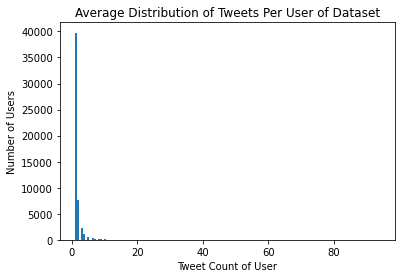

In [152]:
# distribution of tweets per user
user_counts = list(user_dict.values())
for i in range(1):
    plt.figure()
    plt.hist(np.random.choice(user_counts, int(0.05 * len(user_counts))), bins = 150)
    plt.xlabel("Tweet Count of User")
    plt.ylabel("Number of Users")
    plt.title("Average Distribution of Tweets Per User of Dataset")
plt.show()

In [58]:
# 10 most popular tweets per user count

pd.Series(user_counts).value_counts().sort_values(ascending = False)[:10]

1     795931
2     150912
3      46341
4      21619
5      11646
6       7012
7       4638
8       3070
9       2251
10      1645
dtype: int64

### Misinformation Analysis

In [53]:
temp = Twarc(consumer_key = "8PbklgkKB0iOpRtNoDpcK4QmZ",
            consumer_secret = "n36SGsyur75tclPbObX2zuLBBrUW8PC6DVTn3ZWbPMiUzQ5iuP",
            access_token = "1453533683218927616-YerjYEApEUtGw7iqWAFwtdFRhfUgjo",
            access_token_secret = "jsrj1FsUBwzKmNRTc8IG4snDsjT3AetHeScwhGVRzCkSU")
bad_sources = pd.read_csv('iffy_sources.csv')
factcheck_sources = pd.Series(['politifact.com', 'factcheck.org', 'snopes.com', 'mediabiasfactcheck.com', 'flackcheck.org'])
bad_sources.head()

,Domain,MBFC,MBFC factual,BF,FC,PF,WI,Site Rank,Yr online,Name,Media Bias/Fact Check page,Wikipedia article,HTTP,URL,lang,hflag,iffy,Lists
0,100percentfedup.com,FN,L,NaN,NaN,NaN,NaN,101963,NaN,100 Percent Fed Up,https://mediabiasfactcheck.com/100-percent-fed...,NaN,200.0,https://100percentfedup.com/,en,NaN,1.0,2.0
1,10news.one,FN,L,NaN,NaN,NaN,NaN,2688331,NaN,10News.one,https://mediabiasfactcheck.com/10news-one/,NaN,200.0,https://www.10news.one/,en,NaN,1.0,1.0
2,12minutos.com,FN,L,1.0,NaN,NaN,NaN,330294,NaN,12minutos.com,https://mediabiasfactcheck.com/12minutos-com/,NaN,200.0,http://www.12minutos.com/,es,1.0,1.0,2.0
3,21stcenturywire.com,CP,M,NaN,NaN,NaN,NaN,131699,NaN,21st Century Wire,https://mediabiasfactcheck.com/21st-century-wire/,NaN,200.0,https://21stcenturywire.com/,en,NaN,NaN,1.0
4,24aktuelles.com,NaN,NaN,1.0,NaN,NaN,NaN,1138388,2014.0,Erfinde deine eigenen Witz,NaN,NaN,200.0,http://www.24aktuelles.com/,de,1.0,NaN,1.0


In [4]:
# Extracting 10000 most popular tweets and getting their misinformation statistics
most_pop = {'retweets': [], 'tweet_id': []}
#extractor = urlextract.URLExtract()
for x in range(0, 2000001, 100000):
    if x == 0:
        continue
    print("current: " + str(x))
    with jsonlines.open("tweets" + str(x) + ".jsonl") as reader:
        for obj in reader:
            if obj is not None:
                most_pop['retweets'].append(obj['retweet_count'])
                most_pop['tweet_id'].append(obj['id'])
    print("done")

current: 100000
done
current: 200000
done
current: 300000
done
current: 400000
done
current: 500000
done
current: 600000
done
current: 700000
done
current: 800000
done
current: 900000
done
current: 1000000
done
current: 1100000
done
current: 1200000
done
current: 1300000
done
current: 1400000
done
current: 1500000
done
current: 1600000
done
current: 1700000
done
current: 1800000
done
current: 1900000
done
current: 2000000
done


In [43]:
classify = []
rand = np.random.choice(most_pop['tweet_id'], 10000, replace = False)
subset = temp.hydrate(iter(rand))
for obj in subset:
    if obj is not None:
        if "//t.co/" in obj['full_text']:
            links = extractor.find_urls(obj['full_text'])
            for y in links:
                try:
                    trial = requests.get(y)
                    domain = trial.url.split('/')[2]
                    if "www." in domain:
                        domain = domain.split('www.')[1]
                    

                    if factcheck_sources.str.contains(domain).sum() > 0:
                        classify.append("Fact-check")
                    elif bad_sources['Domain'].str.contains(domain).sum() > 0:
                        classify.append("Misinformation")
                    else:
                        classify.append("Neither")
                        
                except:

done


In [45]:
pd.Series(classify).value_counts() / len(classify)

Neither    1.0
dtype: float64

In [58]:
pop_10k = pd.DataFrame(most_pop).sort_values('retweets', ascending = False)[:10000]
pop_10k

,retweets,tweet_id
810691,299846,1241927987508977670
1010681,299846,1266857894013698050
1285712,299846,1443679832089432071
1403738,299845,1433774018361008136
1265814,289186,1289963294682279936
...,...,...
812329,62636,1277297042138828800
1134464,62636,1277303707454115840
914281,62636,1277689472876978176
1069778,62636,1277403180934901761


In [63]:
temp = Twarc(consumer_key = "8PbklgkKB0iOpRtNoDpcK4QmZ",
            consumer_secret = "n36SGsyur75tclPbObX2zuLBBrUW8PC6DVTn3ZWbPMiUzQ5iuP",
            access_token = "1453533683218927616-YerjYEApEUtGw7iqWAFwtdFRhfUgjo",
            access_token_secret = "jsrj1FsUBwzKmNRTc8IG4snDsjT3AetHeScwhGVRzCkSU")
tweets_10k = temp.hydrate(iter(pop_10k['tweet_id']))

In [64]:
# Misinformation analysis
classify = []
extractor = urlextract.URLExtract()
count_10k = 0
for obj in tweets_10k:
    if obj is not None:
        if "//t.co/" in obj['full_text']:
            count_10k += 1
            links = extractor.find_urls(obj['full_text'])
            for y in links:
                try:
                    trial = requests.get(y)
                    domain = trial.url.split('/')[2]
                    if "www." in domain:
                        domain = domain.split('www.')[1]

                    if factcheck_sources.str.contains(domain).sum() > 0:
                        classify.append("Fact-check")
                    elif bad_sources['Domain'].str.contains(domain).sum() > 0:
                        classify.append("Misinformation")
                    else:
                        classify.append("Neither")
                        
                except:
                    continue
    

In [65]:
# all the links that resolved were Neither misinformation nor factcheck

pd.Series(classify).value_counts() / len(classify)

Neither    1.0
dtype: float64

### K-Cores Decomposition and Analysis

In [69]:
import networkx as nx
temp = Twarc(consumer_key = "8PbklgkKB0iOpRtNoDpcK4QmZ",
            consumer_secret = "n36SGsyur75tclPbObX2zuLBBrUW8PC6DVTn3ZWbPMiUzQ5iuP",
            access_token = "1453533683218927616-YerjYEApEUtGw7iqWAFwtdFRhfUgjo",
            access_token_secret = "jsrj1FsUBwzKmNRTc8IG4snDsjT3AetHeScwhGVRzCkSU")

In [120]:
G = nx.DiGraph()
#sample = np.random.choice(most_pop['tweet_id'], 100000, replace = False)
#core_tweets = temp.hydrate(iter(sample))

In [121]:
for x in range(0, 2000001, 100000):
    if x == 0:
        continue
    print("current: " + str(x))
    with jsonlines.open("tweets" + str(x) + ".jsonl") as reader:
        for obj in reader:
            if obj is not None:
                if "retweeted_status" in obj.keys():
                    curr_user = obj['user']['id']
                    rt_user = obj['retweeted_status']['user']['id']
                    G.add_edge(rt_user, curr_user)

current: 100000
current: 200000
current: 300000
current: 400000
current: 500000
current: 600000
current: 700000
current: 800000
current: 900000
current: 1000000
current: 1100000
current: 1200000
current: 1300000
current: 1400000
current: 1500000
current: 1600000
current: 1700000
current: 1800000
current: 1900000
current: 2000000


In [122]:
G.remove_edges_from(nx.selfloop_edges(G))
k_core = nx.k_core(G)

In [128]:
# Max Core at k = 10 in the dataset of 2 million tweets 
nx.core.core_number(k_core)

{725391519788703744: 10,
 725332549485105153: 10,
 725333938789568513: 10,
 729769470764322816: 10,
 2518004870: 10,
 1673974064: 10,
 2348878033: 10,
 3100534323: 10,
 2617443576: 10}

In [141]:
mean_tweets = []
for x in range(2, 11):
    print(x)
    temp_core = nx.k_core(G, k = x)
    tweet_count = 0
    for user in temp_core:
        for neigh in nx.neighbors(G, user):
            tweet_count += 1
            
    # compute avg tweets per user
    mean_tweets.append(tweet_count/nx.number_of_nodes(temp_core))

2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Average Tweets Per User Vs. K-Value in K-Core Decomposition')

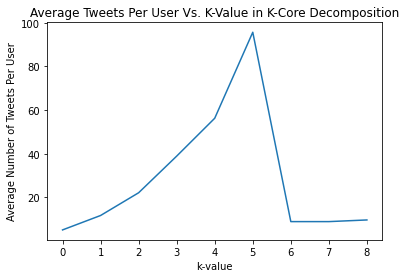

In [144]:
plt.plot(mean_tweets)
plt.xlabel("k-value")
plt.ylabel("Average Number of Tweets Per User")
plt.title("Average Tweets Per User Vs. K-Value in K-Core Decomposition")